In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from joblib import dump, load

In [32]:
df= pd.read_csv('../datasets/DATA/Advertising.csv')

In [33]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [34]:
df.shape

(200, 4)

In [35]:
X=df.drop('sales', axis=1)
y=df.sales

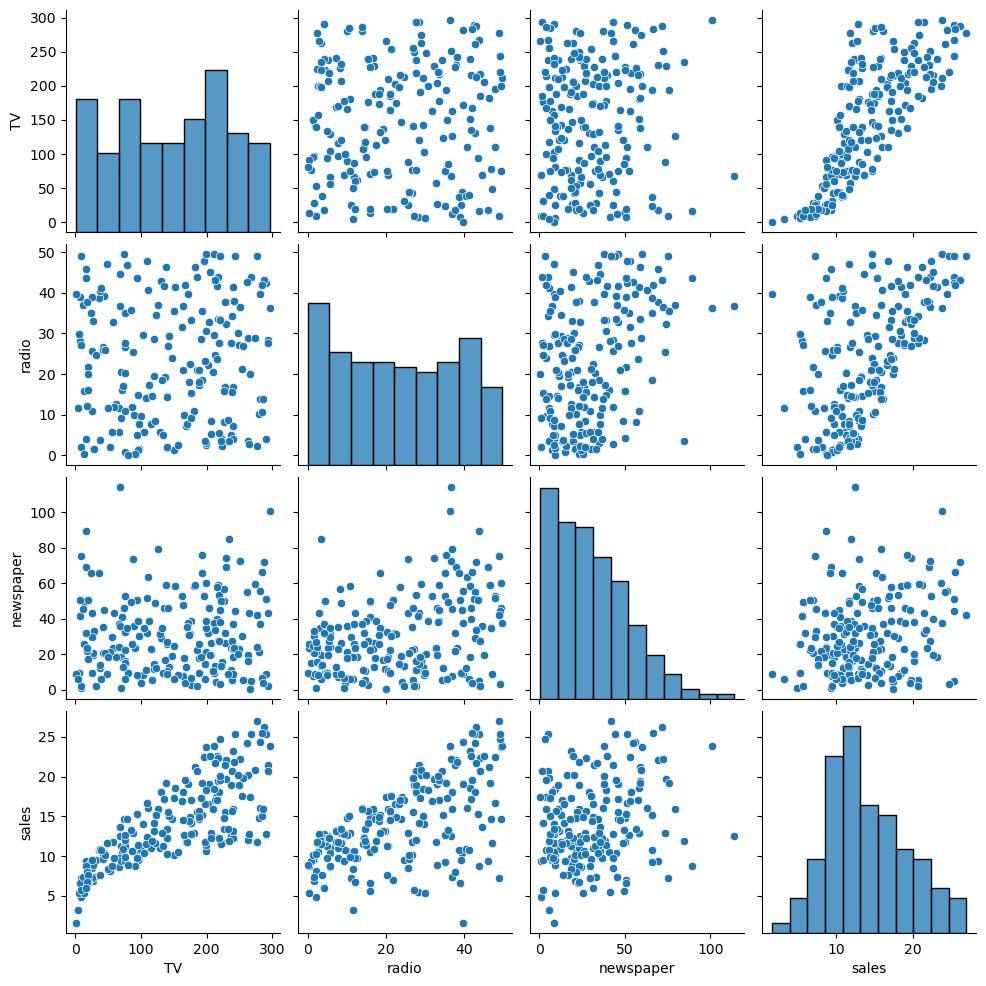

In [36]:
sns.pairplot(df)

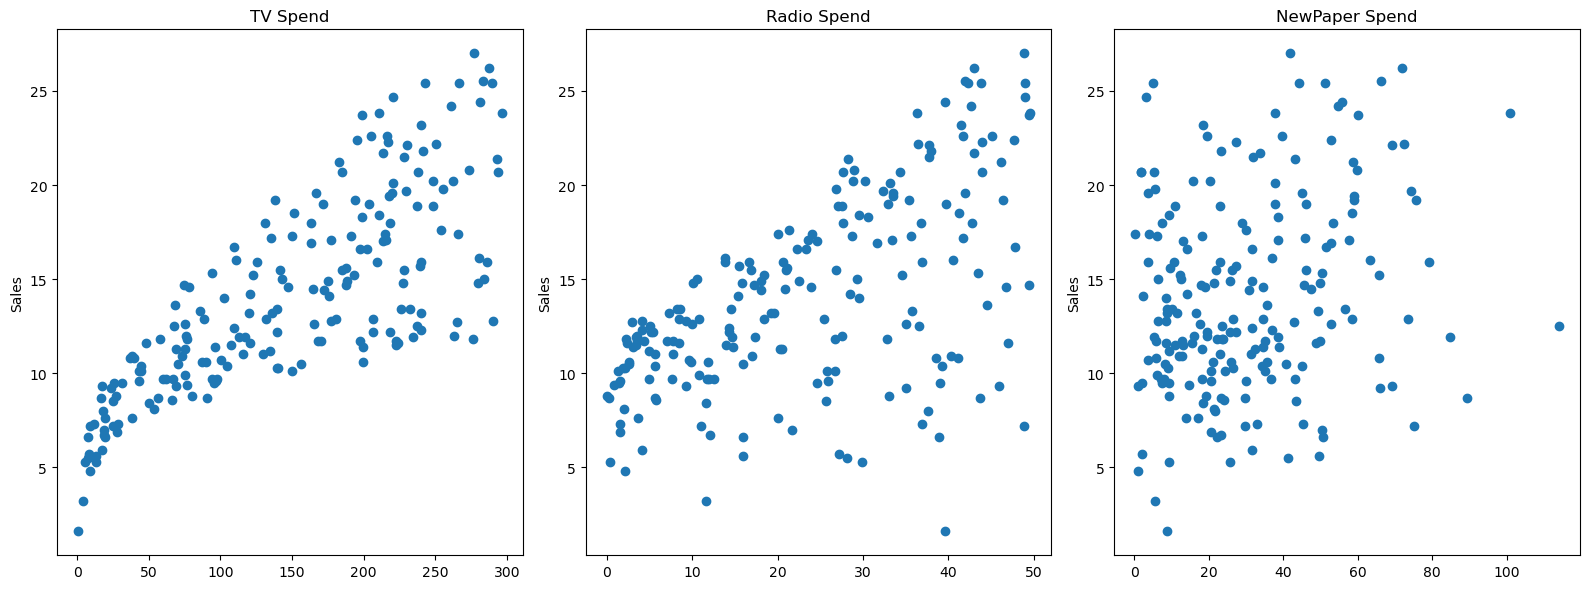

In [37]:
fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(16,6))
axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('NewPaper Spend')
plt.tight_layout()

In [38]:
X_train,X_test, y_train, y_test= train_test_split(df.drop('sales', axis=1), df['sales'],
                                                  random_state=101, test_size=0.3)

In [39]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [40]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [41]:
len(X_test)

60

In [42]:
model= LinearRegression()

In [43]:
model.fit(X_train, y_train)

LinearRegression()

In [44]:
x_pred=model.predict(X_test)

In [45]:
mean_absolute_error(y_test, x_pred)

1.2137457736144803

In [46]:
mean_squared_error(y_test, x_pred)

2.2987166978863782

In [47]:
# root mean square error
np.sqrt(mean_squared_error(y_test, x_pred))

1.516151937599388

In [48]:
test_residuals= y_test - x_pred

In [49]:
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

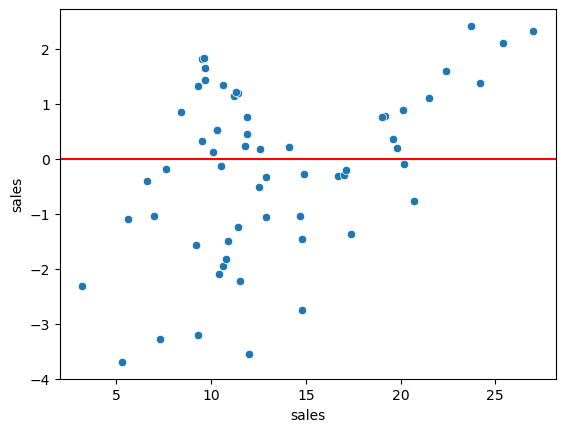

In [50]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='-')

In [51]:
final_model=LinearRegression()

In [52]:
final_model.fit(X,y)

LinearRegression()

In [53]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [55]:
dump(final_model, 'final_sales_modle.joblib')

['final_sales_modle.joblib']

In [56]:
load_model= load('final_sales_modle.joblib')

In [57]:
campain= [[149, 22,12]]

In [58]:
load_model.predict(campain)

C:\Users\hacker\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([13.893032])